<a href="https://colab.research.google.com/github/shivanidhar29/projects/blob/main/ElaheJ_DupointAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd


In [2]:
myAPIKey= 'b280d0c1016895950d65a67f28126623'

In [3]:
stock = 'FB'
balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}").json()


incomeStatements= requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}").json()

print(balanceStatements [1])

{'date': '2020-12-31', 'symbol': 'FB', 'reportedCurrency': 'USD', 'cik': '0001326801', 'fillingDate': '2021-01-28', 'acceptedDate': '2021-01-27 21:13:48', 'calendarYear': '2020', 'period': 'FY', 'cashAndCashEquivalents': 17576000000, 'shortTermInvestments': 44378000000, 'cashAndShortTermInvestments': 61954000000, 'netReceivables': 11335000000, 'inventory': 0.0, 'otherCurrentAssets': 2381000000, 'totalCurrentAssets': 75670000000, 'propertyPlantEquipmentNet': 54981000000, 'goodwill': 19050000000, 'intangibleAssets': 623000000, 'goodwillAndIntangibleAssets': 19673000000, 'longTermInvestments': 6234000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 2758000000, 'totalNonCurrentAssets': 83646000000, 'otherAssets': 0.0, 'totalAssets': 159316000000, 'accountPayables': 1331000000, 'shortTermDebt': 1023000000, 'taxPayables': 2038000000, 'deferredRevenue': 382000000, 'otherCurrentLiabilities': 12245000000, 'totalCurrentLiabilities': 14981000000, 'longTermDebt': 9631000000, 'deferredRevenueNonCurr

In [4]:
twoYearBalanceStatement=balanceStatements[:5]
twoYearIncomeStatement=incomeStatements[:5]

In [5]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]
year=[]
for i in range(0,5):
  profitabilityValue=twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)
  print(returnOnEquity)
  year.append(twoYearIncomeStatement[i]['calendarYear'])


[0.31526517669103693]
[0.31526517669103693, 0.22718840127835369]
[0.31526517669103693, 0.22718840127835369, 0.18292200209788825]
[0.31526517669103693, 0.22718840127835369, 0.18292200209788825, 0.2628407051243953]
[0.31526517669103693, 0.22718840127835369, 0.18292200209788825, 0.2628407051243953, 0.21431934039033185]


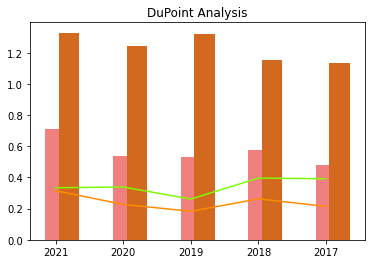

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#Net Margin - Line Chart, Return on Equity - Line Chart, Asset Turnover (Sales/Total Assets) - Bar Chart, Leverage (Total Assets/Net Worth) - Bar Chart
xpos = np.arange(len(year))
plt.bar(xpos + 0.0, assetTurnOver, color = 'lightcoral', width = 0.3)
plt.bar(xpos + 0.2, capitalStructure, color = 'chocolate', width = 0.3)
plt.plot(xpos, returnOnEquity, color = 'darkorange')
plt.plot(xpos, profitability, color = 'lawngreen')
plt.xticks(xpos, year)
plt.title('DuPoint Analysis')
plt.show()

In [7]:
print(year)

print(assetTurnOver)
print(capitalStructure)
print(profitability)
print(returnOnEquity)

['2021', '2020', '2019', '2018', '2017']
[0.7104713019694313, 0.539587988651485, 0.5300578814779271, 0.5736741529167608, 0.4809639865600303]
[1.3291826488040424, 1.2418427001325123, 1.3198487937142518, 1.1569888383039928, 1.1368851466770684]
[0.3338449405998525, 0.3390449601582039, 0.2614679547929898, 0.39600272216053584, 0.39195139350109465]
[0.31526517669103693, 0.22718840127835369, 0.18292200209788825, 0.2628407051243953, 0.21431934039033185]
